# Pandas Showcase
This notebook closely follows the Earth and Enviromental Data Science course at https://earth-env-data-science.github.io/intro.html

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Earthquake Data

In [6]:
#1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
data = pd.read_csv(url)

In [7]:
# 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

# Convert the time to dates
data['time'] = pd.to_datetime(data['time']).dt.date

# Set the earthquake ID as the index
data.set_index('id')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake


In [12]:
# 3) Use describe to get the basic statistics of all the columns

data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


In [22]:
# 4) Use nlargest to get the top 20 earthquakes by magnitude

# Store the 20 largest earthquakes by magnitude
largestEQ = data.nlargest(20, 'mag')

# Access the state / country information
largestEQ['place']



37371                   94km NW of Iquique, Chile
50562     19km SE of Little Sitkin Island, Alaska
36918                   53km SW of Iquique, Chile
33808       93km SSE of Kirakira, Solomon Islands
31496        70km SW of Panguna, Papua New Guinea
33537        112km S of Kirakira, Solomon Islands
95913             74km S of Intipuca, El Salvador
31850                33km ESE of Petatlan, Mexico
34318       56km WSW of Panguna, Papua New Guinea
106285        154km NW of Kota Ternate, Indonesia
111052              144km NE of Ndoi Island, Fiji
97602                  Southern East Pacific Rise
14025                   272km ESE of Hotan, China
37367                  91km WNW of Iquique, Chile
39915            22km SSW of Kamariotissa, Greece
47934               154km NNW of Visokoi Island, 
50609       80km SSE of Raoul Island, New Zealand
61294               99km NNE of Ndoi Island, Fiji
66278              4km W of Puerto Madero, Mexico
78063       Federated States of Micronesia region


In [61]:
# 5) Extract the state or country using Pandas text data functions

# Split the string along the comma
splitPlace = largestEQ['place'].str.split(', ')

# Store all the countries by doing some simple operations
countryList = []
for place in splitPlace:
    if(len(place) == 1):
        countryList.append(place[0])
    else:
        countryList.append(place[1])
        
countryList

# Create a new column called country
largestEQ['country'] = countryList

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
37371,2014-04-01,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake,Chile
50562,2014-06-23,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake,Alaska
36918,2014-04-03,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake,Chile
33808,2014-04-12,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake,Solomon Islands
31496,2014-04-19,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake,Papua New Guinea


In [62]:
# 6) Display each unique value from the new column

largestEQ['country'].unique()

array(['Chile', 'Alaska', 'Solomon Islands', 'Papua New Guinea',
       'El Salvador', 'Mexico', 'Indonesia', 'Fiji',
       'Southern East Pacific Rise', 'China', 'Greece', '', 'New Zealand',
       'Federated States of Micronesia region'], dtype=object)

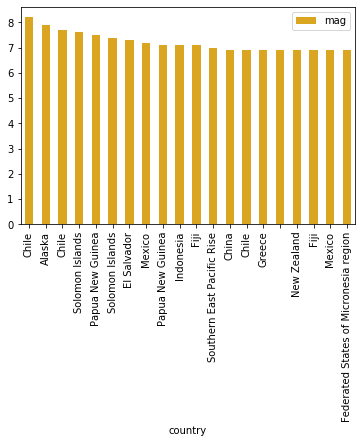

In [73]:
# 7) Make a bar chart of the top 5 earthquake magnitudes vs country/state
largestEQ.plot.bar(x = 'country', y = 'mag', color = 'goldenrod')

In [8]:
# 8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

filteredData = data[data['mag'] <= 4]


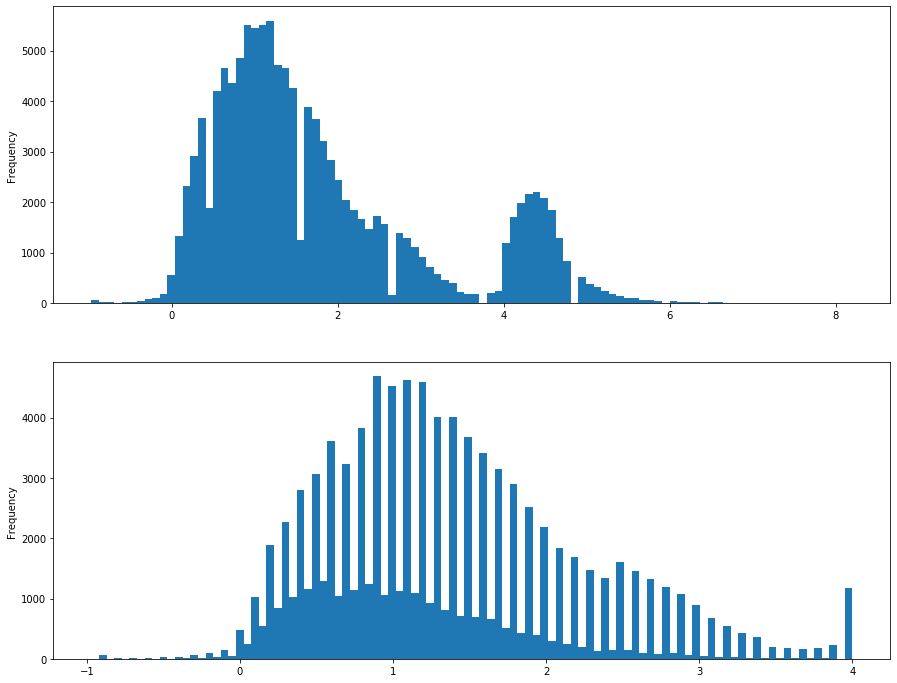

In [9]:
# 9) Make a histogram the distribution of the Earthquake magnitude
fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=1)

data['mag'].plot.hist(bins = 100, ax = axes[0])
filteredData['mag'].plot.hist(bins = 100, ax = axes[1])


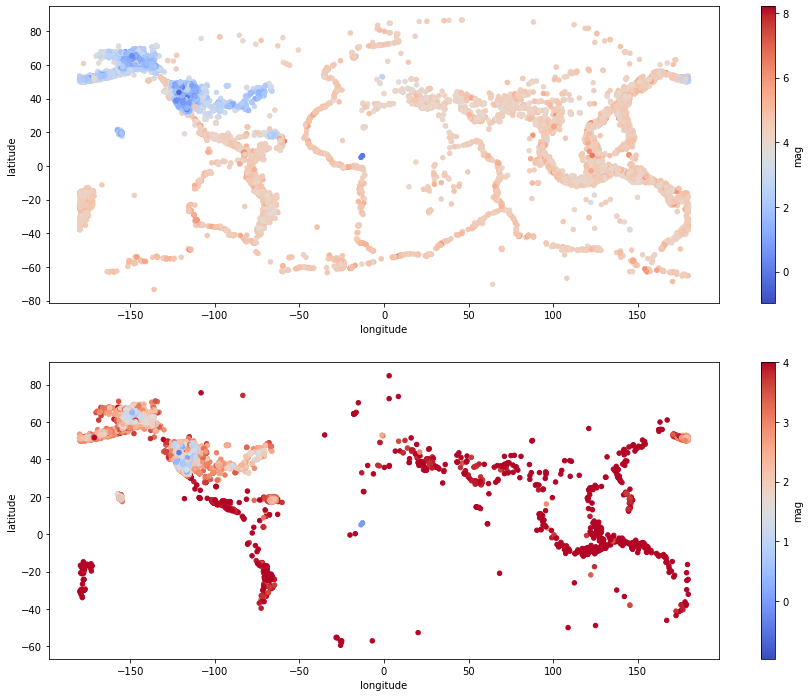

In [12]:
# 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude
fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=1)

data.plot.scatter(x = 'longitude', y = 'latitude', ax = axes[0], c = 'mag', cmap = 'coolwarm')
filteredData.plot.scatter(x = 'longitude', y = 'latitude', ax = axes[1], c = 'mag', cmap = 'coolwarm')
